In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('raw_inventory.csv')
df.head()



,item_id,item_name,department,quantity_in_stock,quantity_used,restock_level,unit_cost,date
0,101,Gloves,ER,500,120,300,0.5,2024-01-05
1,102,Masks,ICU,800,300,500,0.3,2024-01-06
2,103,Syringes,ER,600,200,400,0.2,2024-01-07
3,104,IV Kits,ICU,200,150,250,15.0,2024-01-08
4,105,Bandages,General Ward,1000,100,600,0.1,2024-01-09


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['stock_gap'] = df['quantity_in_stock'] - df['restock_level']
df['total_cost_used'] = df['quantity_used'] * df['unit_cost']
df


,item_id,item_name,department,quantity_in_stock,quantity_used,restock_level,unit_cost,date,stock_gap,total_cost_used
0,101,Gloves,ER,500,120,300,0.5,2024-01-05,200,60.0
1,102,Masks,ICU,800,300,500,0.3,2024-01-06,300,90.0
2,103,Syringes,ER,600,200,400,0.2,2024-01-07,200,40.0
3,104,IV Kits,ICU,200,150,250,15.0,2024-01-08,-50,2250.0
4,105,Bandages,General Ward,1000,100,600,0.1,2024-01-09,400,10.0


In [4]:
low_stock_items = df[df['quantity_in_stock'] < df['restock_level']]
low_stock_items


,item_id,item_name,department,quantity_in_stock,quantity_used,restock_level,unit_cost,date,stock_gap,total_cost_used
3,104,IV Kits,ICU,200,150,250,15.0,2024-01-08,-50,2250.0


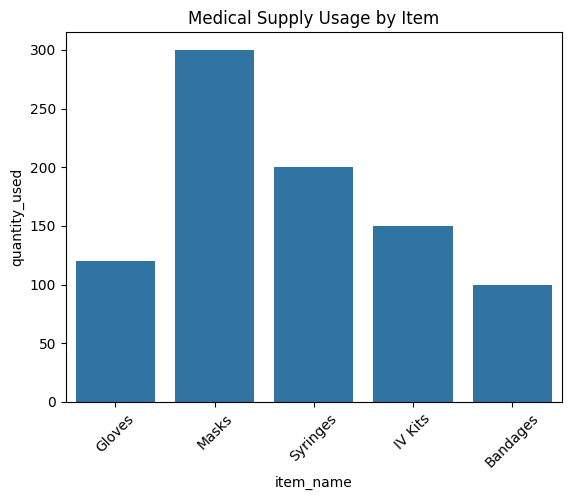

In [5]:
sns.barplot(x='item_name', y='quantity_used', data=df)
plt.title('Medical Supply Usage by Item')
plt.xticks(rotation=45)
plt.show()


## Key Insights
- ICU department consumes high-cost medical supplies
- IV Kits show high usage with frequent understock risk
- Data-driven restock thresholds can reduce shortages
